In [1]:
### python gdspy framework : 
import gdspy

gdsii = gdspy.GdsLibrary()
gdsii.read_gds(r"D:\Documents\MetaMaterial_MetaOptics\metacode\notebooks\example_folder\lens_assembly.gds")


In [2]:
top_cell = gdsii.top_level()[0]
polygons = top_cell.get_polygons(by_spec=True)

for (layer, datatype), poly_list in polygons.items():
    print(f"Layer: {layer}, Datatype: {datatype}, Number of polygons: {len(poly_list)}")

Layer: 0, Datatype: 0, Number of polygons: 63344


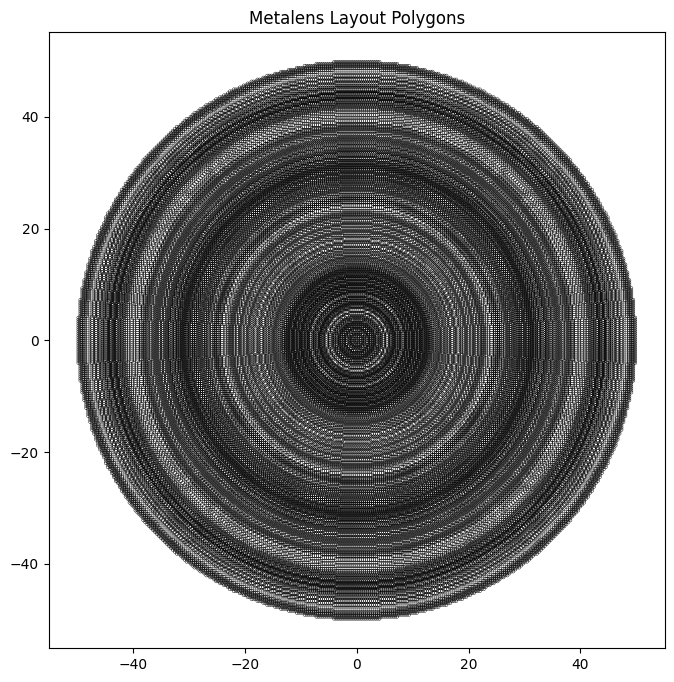

In [3]:
import matplotlib.pyplot as plt

# Get all polygons on this layer
poly_list = polygons[(0, 0)]

fig, ax = plt.subplots(figsize=(8, 8))

for poly in poly_list:
    ax.fill(poly[:, 0], poly[:, 1], edgecolor='black', fill=False, linewidth=0.3)

ax.set_aspect('equal')
ax.set_title("Metalens Layout Polygons")
plt.show()


In [4]:
### Compute basic statistics 
import numpy as np

areas = []
perimeters = []

for poly in poly_list:
    # Polygon area using shoelace formula
    x = poly[:, 0]
    y = poly[:, 1]
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    areas.append(area)
    
    # Perimeter
    dx = np.diff(np.append(x, x[0]))
    dy = np.diff(np.append(y, y[0]))
    perimeter = np.sum(np.sqrt(dx**2 + dy**2))
    perimeters.append(perimeter)

print(f"Total number of polygons: {len(poly_list)}")
print(f"Average area: {np.mean(areas):.2e}")
print(f"Average perimeter: {np.mean(perimeters):.2f}")


Total number of polygons: 63344
Average area: 3.33e-01
Average perimeter: 1.92


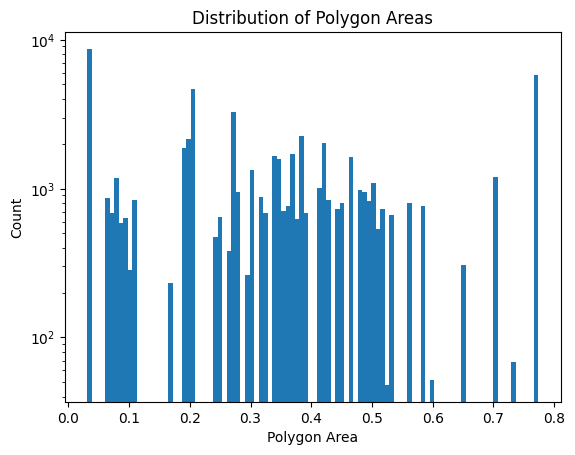

In [5]:
plt.hist(areas, bins=100)
plt.xlabel("Polygon Area")
plt.ylabel("Count")
plt.title("Distribution of Polygon Areas")
plt.yscale("log")
plt.show()


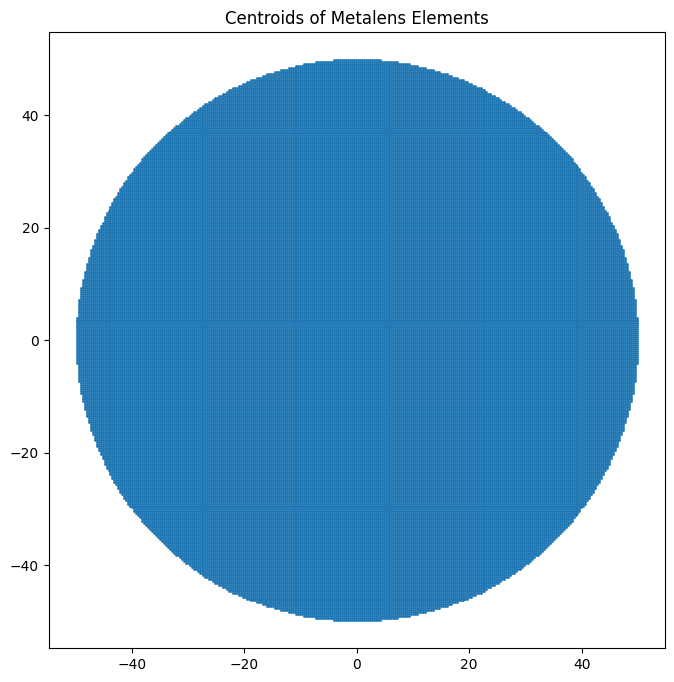

In [6]:
centroids = []

for poly in poly_list:
    x = poly[:, 0]
    y = poly[:, 1]
    cx = np.mean(x)
    cy = np.mean(y)
    centroids.append((cx, cy))

centroids = np.array(centroids)

plt.figure(figsize=(8, 8))
plt.scatter(centroids[:, 0], centroids[:, 1], s=1)
plt.gca().set_aspect("equal")
plt.title("Centroids of Metalens Elements")
plt.show()


In [7]:
import pandas as pd

df = pd.DataFrame({
    "centroid_x": centroids[:, 0],
    "centroid_y": centroids[:, 1],
    "area": areas,
    "perimeter": perimeters
})

df.to_csv("metalens_polygons_data.csv", index=False)


In [ ]:
### Simulating lens performance from GDS Data: 
# 
# Convert GDSII → structure model → simulate
#1. Parse the GDSII, get positions & shapes of nano-posts or phase mask pattern.
#2. Build 3D geometry (extruded pillars, posts, etc.) in an EM simulator.
#3. Run EM simulation to compute transmission phase profile, or simulate far-field focusing.